## Training Network

In supervised training, the network processes inputs and compares its resulting outputs against the desired outputs. 

Errors are propagated back through the system, causing the system to adjust the weights which control the network. This is done using the Backpropagation algorithm, also called backprop. This process occurs over and over as the weights are continually tweaked. 

The set of data which enables the training is called the "training set." 

During the training of a network the same set of data is processed many times as the connection weights are ever refined. Iteratively passing batches of data through the network and updating the weights, so that the error is decreased, is known as Stochastic Gradient Descent (SGD). 

Training refers to determining the best set of weights for maximizing a neural network’s accuracy. 

The amount by which the weights are changed is determined by a parameter called Learning rate.

Neural networks can be used without knowing precisely how training works. Most modern machine learning libraries have greatly automated the training process.

### NOTE:
Basicaly this notebook prepared to use within **Google Colab**: https://colab.research.google.com/. 

The Google Colabatory has **free Tesla K80 GPU** and already prepared to develop deep learning applications.

First time opens this notebook, do not forget to enable **Python 3** runtime and **GPU** accelerator in Google Colab **Notebook Settings**. 


### Setup Project
Create workspace and change directory.


In [1]:
PROJECT_HOME = '/content/keras-movie-reviews-classification'

import os.path
if not os.path.exists(PROJECT_HOME):
  os.makedirs(PROJECT_HOME)
os.chdir(PROJECT_HOME)

!pwd

/content/keras-movie-reviews-classification


### Import Project
Import GitHub project to workspace.

In [2]:
# Import project and override existing data.
!git init .
!git remote add -t \* -f origin https://github.com/alex-agency/keras-movie-reviews-classification.git
!git reset --hard origin/master
!git checkout

!ls -la input

Initialized empty Git repository in /content/keras-movie-reviews-classification/.git/
Updating origin
remote: Counting objects: 27, done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 27 (delta 8), reused 18 (delta 3), pack-reused 0
Unpacking objects: 100% (27/27), done.
From https://github.com/alex-agency/keras-movie-reviews-classification
 * [new branch]      master     -> origin/master
HEAD is now at 3ed38b6 step3-choosing-model-mlps
total 36044
drwxr-xr-x 2 root root     4096 Apr 22 20:37 .
drwxr-xr-x 4 root root     4096 Apr 22 20:37 ..
-rw-r--r-- 1 root root 17163254 Apr 22 20:37 dataset.npz
-rw-r--r-- 1 root root   360416 Apr 22 20:37 mlps-model-definition.h5
-rw-r--r-- 1 root root 19372046 Apr 22 20:37 reviews.tsv.bz2


### Keras
Keras is a high-level API, written in Python and capable of running on top of TensorFlow, Theano, or CNTK deep learning frameworks.
Keras provides a simple and modular API to create and train Neural Networks, hiding most of the complicated details under the hood.
By default, Keras is configured to use Tensorflow as the backend since it is the most popular choice.
Keras is becoming super popular recently because of its simplicity.
### Keras workflow
<img src="https://www.learnopencv.com/wp-content/uploads/2017/09/keras-workflow.jpg" width="700px">

In [3]:
# Load Keras libraries
from keras.models import load_model
from keras import callbacks

Using TensorFlow backend.


### Load model and dataset
Loading model definition from HDF5 file.


In [4]:
import numpy as np
# Load data from numpy array
loaded = np.load('input/dataset.npz')

(X_train, Y_train), (X_test, Y_test) = loaded['dataset']

# Load model from HDF5 file.
model = load_model('input/mlps-model-definition.h5') # model with MLP network

print("Model Summary")
print(model.summary())

Model Summary
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 1)            5000      
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 85,602
Trainable params: 85,602
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.6/dist-packages/keras/models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


### Configuring the training process
Once the model is ready, we need to configure the learning process.

Compile the model means that Keras will generate a computation graph in TensorFlow.

### Loss functions
In a supervised learning problem, we have to find the error between the actual values and the predicted value. There can be different metrics which can be used to evaluate this error. This metric is often called loss function or cost function or objective function. There can be more than one loss function depending on what you are doing with the error. In general, we use:

* binary-cross-entropy for a binary classification problem
* categorical-cross-entropy for a multi-class classification problem
* mean-squared-error for a regression problem and so on

### Optimizers
An Optimizer determines how the network weights are updated.

Keras provides a lot of optimizers to choose from.
RMSprop and Adam is a good choice of optimizer for most problems.

### Overfitting
Overfitting describes the situation in which your model is over-optimized to accurately predict the training set, at the expense of generalizing to unknown data (which is the objective of learning in the first place). This can happen because the model greatly twists itself to perfectly conform to the training set, even capturing its underlying noise.

How can we avoid overfitting? The simplest solution is to split our dataset into a training set and a test set. The training set is used for the optimization procedure, but we evaluate the accuracy of our model by forwarding the test set to the trained model and measuring its accuracy.

During training, we can monitor the accuracy of the model on the training set and test set. The longer we train, the more likely our training accuracy is to go higher and higher, but at some point, it is likely the test set will stop improving. This is a cue to stop training at that point. We should generally expect that training accuracy is higher than test accuracy, but if it is much higher, that is a clue that we have overfit.

In [5]:
# Compile model
model.compile(loss='binary_crossentropy', # cross-entropy loss function for binary classification
              optimizer='adam', # Adam optimiser one of the most popular optimization method
              metrics=['accuracy']) # print the accuracy during training

# Early stopping callback
# Stop training when a monitored quantity has stopped improving.
# Using held-out validation set, to determine when to terminate the training process to avoid overfitting.
early_stopping = callbacks.EarlyStopping(monitor='val_loss', # quantity to be monitored
                                         min_delta=0, # minimum change in the monitored quantity to qualify as an improvement
                                         patience=2, # number of epochs with no improvement after which training will be stopped 
                                         verbose=1, mode='auto')
# Train model
history = model.fit(X_train, Y_train, # train the model using the training set
                    batch_size=8, # in each iteration, use size of training examples at once
                    epochs=20, # iterate amount of times over the entire training set
                    callbacks=[early_stopping], # called after each epoch
                    validation_split=0.2, # use 20% of the data for validation
                    verbose=2) # enables detailed logs, where 2 is print some information after each epoch 

Train on 32000 samples, validate on 8000 samples
Epoch 1/20
 - 25s - loss: 0.3563 - acc: 0.8333 - val_loss: 0.2842 - val_acc: 0.8824
Epoch 2/20
 - 24s - loss: 0.2389 - acc: 0.9042 - val_loss: 0.2868 - val_acc: 0.8796
Epoch 3/20
 - 24s - loss: 0.2105 - acc: 0.9167 - val_loss: 0.3067 - val_acc: 0.8801
Epoch 00003: early stopping


In [6]:
# Evaluate model
score = model.evaluate(X_test, Y_test, verbose=0) # evaluate the trained model on the test set

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.29445332052707673
Test accuracy: 0.88235


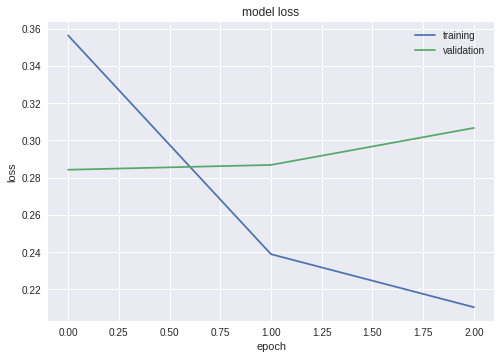

In [7]:
import matplotlib.pyplot as plt

# Plot the loss over each epochs.
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

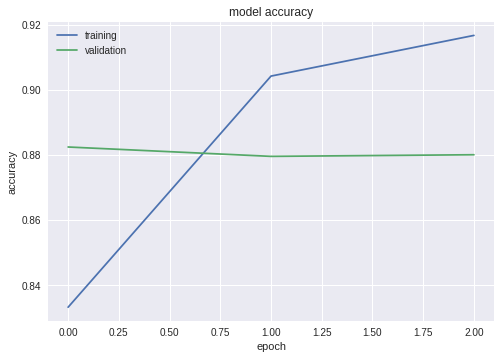

In [8]:
# Plot the accuracy evaluated on the training set.
plt.plot(history.history['acc'], label='training');
plt.plot(history.history['val_acc'], label='validation');
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

### Export trained model to file
Saving whole Keras model into a single HDF5 file which will contain:
* the architecture of the model, allowing to re-create the model
* the weights of the model
* the training configuration (loss, optimizer)
* the state of the optimizer, allowing to resume training exactly where you left off.


In [9]:
# Model filename
model_filename = 'mlps-model.h5'

# Create output directory
output_dir = 'output'
if not os.path.exists(output_dir):
  os.makedirs(output_dir)
  
model_file = os.path.join(output_dir, model_filename)

# Export model into HDF5 file.
model.save(model_file)

!ls -la output

total 1040
drwxr-xr-x 2 root root    4096 Apr 22 20:39 .
drwxr-xr-x 5 root root    4096 Apr 22 20:39 ..
-rw-r--r-- 1 root root 1055200 Apr 22 20:39 mlps-model.h5


### Downloading file to your local file system

It will invoke a browser download of the file to your local computer.

In [0]:
from google.colab import files
# Download file
files.download(model_file)